# Prose Preprocessing

## known problems

- some leftover metadata informations inside the `text`column
- 

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
prose = pd.read_csv("../corpora/german_prose_all.csv")

In [31]:
prose.sample(3)

,filename,author,title,year,textlength,text
1306,Christoph_Martin_Wieland_-_Musarion_oder_die_P...,Christoph Martin Wieland,Musarion oder die Philosophie der Grazien,1768,17982,[ musarion ] Nach der Ausgabe letzter Hand ( 1...
107,Johann_Hinrich_Fehrs_-_Maren_(1907),Johann Hinrich Fehrs,Maren,1907,160005,En Dörpromaan ut de Tiet von 1848/51 von mit B...
601,Franz_Kafka_-_Josefine_die_Sängerin_oder_Das_V...,Franz Kafka,Josefine die Sängerin oder Das Volk der Mäuse,1924,7049,"Von Josefine , die Sängerin oder Das Volk der ..."


## Shrink and edit corpus

### Only prose of the early modern (= Frühe Moderne) according to Klaus Wieland

Demarcation: https://journals.openedition.org/rg/976#ftn10

In [32]:
prose = prose[(prose.year >= 1880) & (prose.year <= 1933)]

In [33]:
prose.shape

(1667, 6)

### Literary Trends classification according to Klaus Wieland

Classification: https://journals.openedition.org/rg/976#ftn10

In [34]:
literary_trends = {"Naturalismus": list(range(1880, 1890)),
                   "Jahrhundertwende" : list(range(1890, 1910)),
                   "Expressionismus_Dadaismus": list(range(1910, 1925)),
                   "Neue Sachlichkeit": list(range(1925, 1934))}

In [35]:
def get_epoch(year):
    epoch = ""
    for k, v in literary_trends.items():
        if year in v:
            epoch = k
            break
    return epoch

In [36]:
nprose = prose.copy()
nprose["epoch"] = nprose.apply(lambda row: get_epoch(row.year), axis=1)

In [37]:
nprose.sample(3)

,filename,author,title,year,textlength,text,epoch
2167,Paul_Lindau_-_Toggenburg_(1883),Paul Lindau,Toggenburg,1883,21513,Verlag der Wiking-Bücher Post & Obermüller Bre...,Naturalismus
764,Nataly_von_Eschstruth_-_Der_Irrgeist_des_Schlo...,Nataly von Eschstruth,Der Irrgeist des Schlosses,1886,73004,Roman Dritte Auflage . Viertes und fünftes Tau...,Naturalismus
1085,Hermann_Bahr_-_Himmelfahrt_(1916),Hermann Bahr,Himmelfahrt,1916,106834,1919 Über viele Dinge kann ich nur mit Gott re...,Expressionismus_Dadaismus


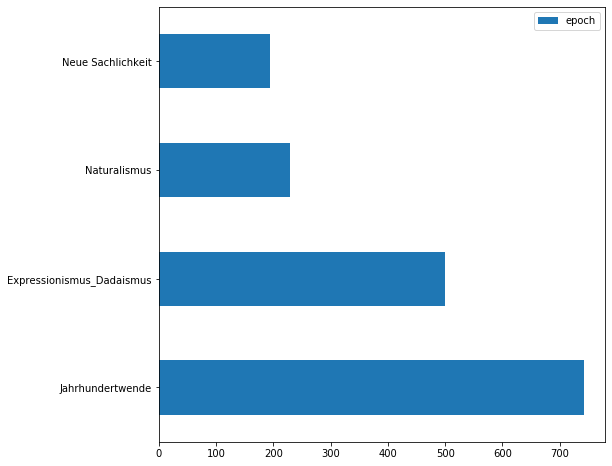

In [40]:
nprose.epoch.value_counts().plot(kind="barh", figsize=(8, 8))
plt.legend()
plt.show()

## Save csv with current date

In [42]:
import datetime as dt

today = dt.datetime.today().strftime('(%d_%m_%y)')  
output_file = '../corpora/german_modern_prose{}.csv'.format(today)
nprose.to_csv(output_file, index=False)

In [ ]:
sns.distplot(prose2.year, 
             kde=False, 
             rug=False, 
             bins=15, 
             hist_kws=dict(edgecolor="black", linewidth=1),
             axlabel="Jahr")
plt.axvline(prose2.year.mean(), 0, 1, 
            linestyle="-",
            linewidth=2.0,
            color="black",
            label="Mittelwert")
plt.axvline(prose2.year.median(), 0, 1, 
            linestyle="--",
            linewidth=2.0,
            color="#d45087",
            label="Median")
plt.legend()
plt.title("Verteilung der Prosa Werke nach Erscheinungsjahren")
plt.show()